# One-Hot 编码

## one-hot 编码概念

Each label will be represented by a vector that is as long as there are classes and it has the value 1.0 for the correct class and 0 every where else.

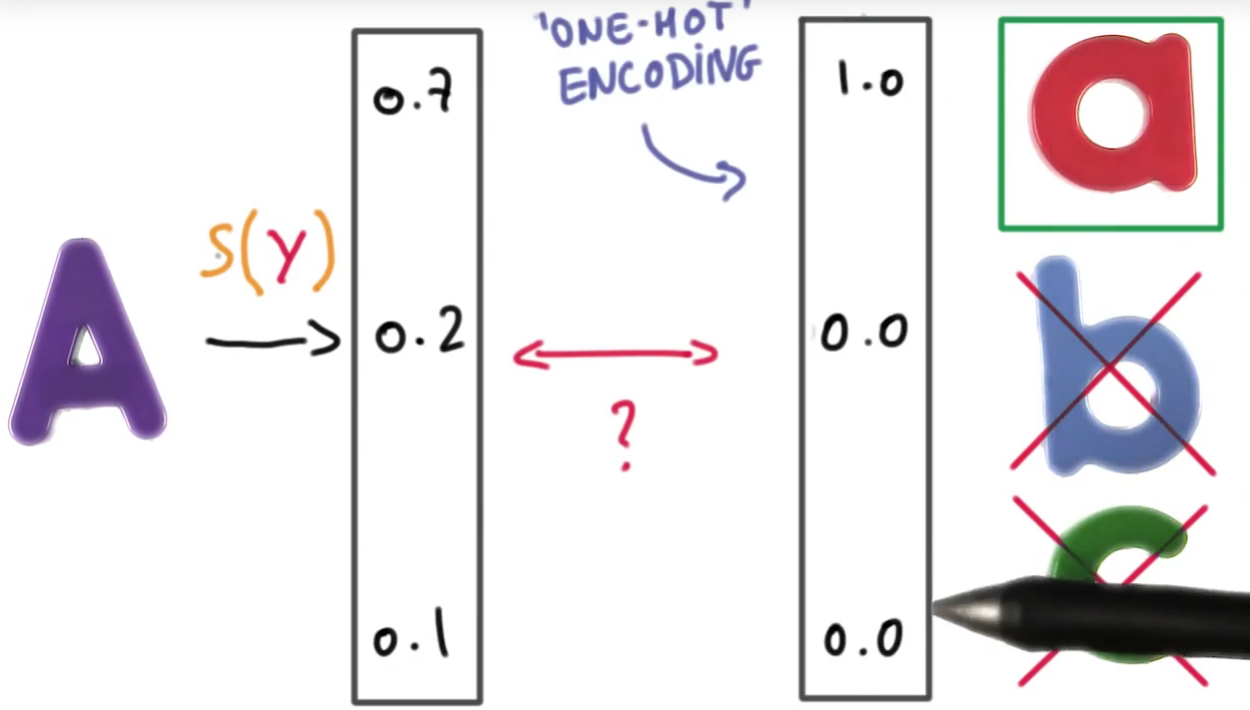

## one-hot 编码缺点

one-hot 编码对大多数情况都适用,直到你遇到有数以千万计不同的类别的时候,在这种情况下 你的编码向量将变得很大很大,并且它大部分都是 0 这会使得效率很低,在之后 会看到我们使用嵌入的方法来解决这个问题.

## one-hot 编码优点

我们能够通过简单地比较两个向量来衡量我们做的好不好，其中一个向量是分布向量，它来自你的分类器，代表着样本属于不同类别的概率；另外一个则是标签向量，它经过 one-hot 编码与每个标签相对应.

# 交叉熵 (Cross-Entropy)

The natural way to measure the distance between those two probability vectors is called the cross-entropy.

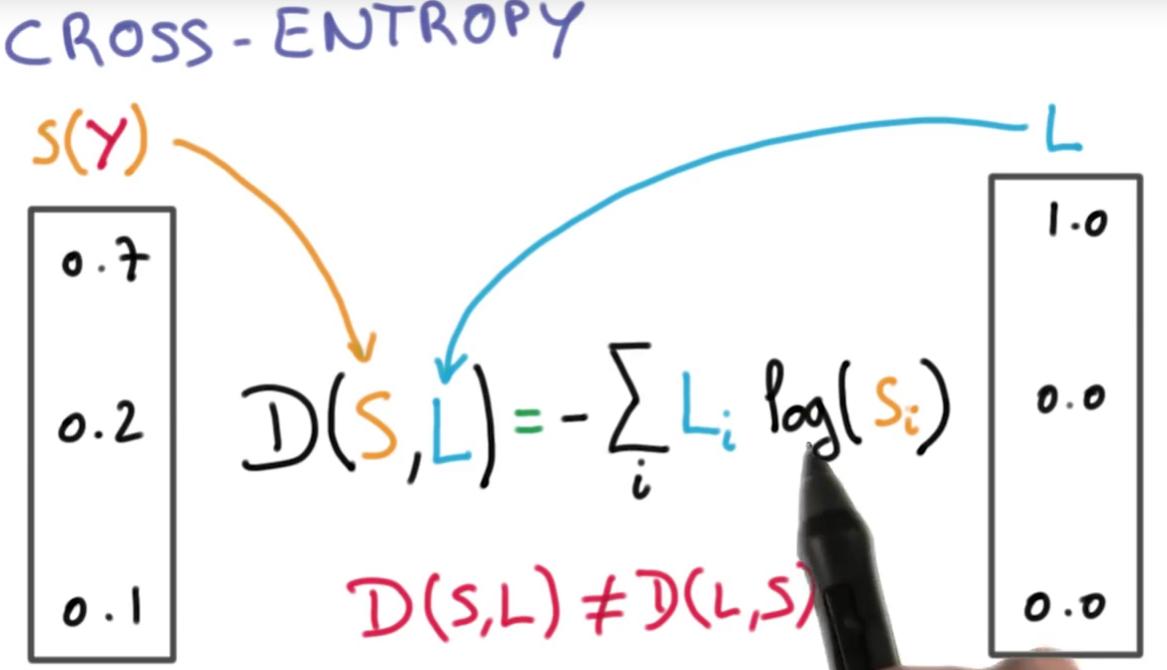

注意,因为运算过程中有对数运算,交叉熵的两个变量是不对称的,所以你要确保你的标签向量和你的分布向量在正确的位置.你的标签向量经过了 one-hot 编码,所以会有很多的零,因而它不能作为对数的真数;对于你的分布向量,它是由 softmax 方法计算得到的概率值,所以它总会大于 0 也就是它可以被放在真数上.

# 最小化交叉熵

## 数值计算的稳定性

当你做数值计算时，你总是需要担心计算值过大或过小，尤其是把非常小的值加到一个非常大的值上会引起很多错误.

在 Python 上试试这个:

设一个变量是10亿 1 billion (109)， 然后向它加 10-6 加一百万 (106) 次，然后再减去10亿，结果是什么？

In [2]:
#numeric stability

a = 1000000000
for i in range(1000000):
    a = a + 1e-6
print (a - 1000000000)

0.95367431640625


这个测验中的例子 数学上结果应该是 1.0,但是代码的结果是 0.95,这是一个很大的区别. 而用1代替 10 亿,会看到误差变小了.

In [3]:
#numeric stability

a = 1
for i in range(1000000):
    a = a + 1e-6
print (a - 1)

0.9999999999177334


由此，我们想让涉及在损失函数计算中的值不要太大或太小，一个好的指导原则是：我们总想要我们的变量均值为零并且尽可能同方差.

如果你处理图像 这很简单:你可以取得你图像的像素值,它们通常在0到255之间,并且很容易减去128和除以128.这并没有改变你的图像的内容,但它更适合数值优化.

你也想让你的权重和偏差初始化在一个足够好的开始点. 在梯度下降过程中,有很多好的机制去找到好的初始化值,但我们想聚焦在一个简单通用的方法上,从均值为 0 标准差为 sigma 的高斯分布中随机抽样,作为初始权重值. sigma 的值决定了最优化过程中在初始点你输出的数量级. 因为上面的 softmax 这个数量级,也决定了你初始化概率分布的峰值,也决定了你初始化概率分布的峰值.这将会很武断.一个小的 sigma 意味着你的分布是不确定的.通常比较好的是开始于一个不确定的分布,随着训练的过程让最优化变得越得更自信.所以用一个小的 sigma 开始.

# Logistic 多项式回归法

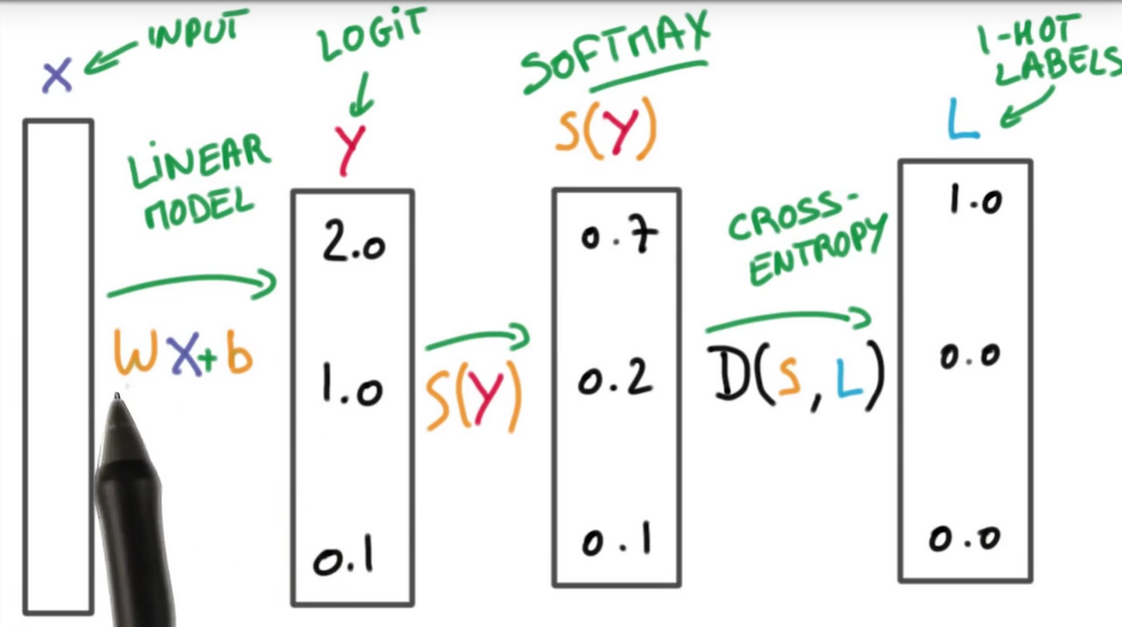
对于一个给定的输入,通过一个线性模型,它将被转变为一个 logit 分数,这个的运算很简单,即输入乘上一个矩阵 w 再加上一个偏差项 b.接着, 使用 softmax 方法,我们可以将 logit 分数转化成转化成概率值.接着我们通过交叉熵方法,计算概率向量与经过 one-hot 编码的标签向量的距离.我们称这整个过程为 Logistic 多项式回归法.